# Root-finding Algorithms
<style type="text/css">
  .reveal p {
    text-align: left;
  }
  .reveal ul {
    display: block;
  }
  .reveal ol {
    display: block;
  }
</style>
## Setup
* Many times we are interested in finding $x^*$ that satisfies
$$
    f(x^*) = 0
$$
for some $f:\mathbb R^n\rightarrow\mathbb R^n$ 
*  Note we've already seen an example of this in solving the fixed point problem:
$$
    x = g(x)
$$
* They are isomorphic as a fixed point $g(x*)=x^*$ is equilvalent to the root of
$$
    f(x) = g(x)- x
$$
* And the root of $f(x^*)=0$ is equivalent to the fixed point of
$$
    g(x) = f(x) + x
$$

## Solution Approach
* Nearly all root finding methods have the same structure

* Start with a guess $x_0$

* Apply some algorithm $H(x_0,f)$ to get a new point $x_1$

    * Note algorithm will use properties of $f$

* Keep applying algorithm to get a sequence ${x_n}_n$ via
$$
    x_{n+1} = H(f,x_n)
$$

* Objective is to construct $H$ such that $x_n\rightarrow x^*$

    * Ideally you should get convergence independent of $x_0$


## Speed of Convergence for Root-finding
* A method is said to **q-converge** at rate $k$ if
$$
    \lim_{n\rightarrow\infty}\frac{|x^* - x^{n+1}|}{|x^*-x^n|^k}=C
$$ with $C>0$

* A method is said to **r-converge** at rate $k$ if:

    * The sequence of the successive error terms is dominated by $\{v_n\}$
    $$
        |x^* - x^n| \leq v_n \text{ for all n}
    $$

    * $\{v_n\}$ q-converges at rate k to 0

## Function Iteration
*  If $g$ is a **contraction** then if we start from $x_0$, the iteration given by
$$
    x_{k+1} = g(x_k)
$$ will converge to $x^*$ for any value $x_0$

*  Does not need to globally be a contraction if $x_0$ is close enough to $x^*$.  Sequence will converge if 
$$
|g'(x^*)| <1
$$

*  Moreover
$$
    x^{n+1}-x^* \approx g'(x^*)(x^n-x^*)
$$hence this method q-converges linearly (slow)

## Example

In [1]:
g(x) = 2-1.5/(1+x)
x0 = 0.25
diff = 1.
while diff > 1e-6
    global x0,diff
    x1 = g(x0)
    diff = abs(x1 - x0)
    x0 = x1
end
println("The fixed point is: $x0")

The fixed point is: 1.366025288620121


![](assets/roots1.gif)


# Bisection Method
## Description
* This is the simplest and most robust method to find the root of a **one-dimensional continuous** function on a closed interval

* Assumptions:

    * $f(x)$ defined on $[a,b]$ with $f(a)$ and $f(b)$ opposite signs

    * $f(x)$ continuous

* Intermediate value theorem guarantees existence of a root 

* Can construct an algorithm to find one via iteration

## Algorithm 
WLOG assume $f(a) < 0$ and $f(b) >0$

1. Set $n=1$ with $a^n = a$ and $b^n$

2. Construct $c^n = \frac{a^n+b^n}{2}$

3. If $f(c^n) >0$ set $a^{n+1} = a^n$ and $b^{n+1} = c^n$

4. Else set $a^{n+1} = c^n$ and $b^{n+1} = b^n$

5. Stop if $|a^{n+1}-b^{n+1}|<\epsilon$, otherwise go to 2

## Algorithm Code

In [2]:
f(x) = x - g(x)
a,b = 0.5,1.75
diff = 1
while diff > 1e-6
    global a,b,diff
    c = (a+b)/2
    if f(c) > 0
        b = c
    else
        a = c
    end
    diff = b-a
end
println("Root is $((a+b)/2)")

Root is 1.3660253882408142


![](assets/roots2.gif)


## Advantages
* **Robust and Stable:** We are guaranteed to find a root to our desired accuracy

* At the end of the $n^{th}$ iteration we will have an interval of size
$$
    \frac{b-a}{2^{n-1}}
$$

* Thus we will reach accuracy $\delta$ in
$$
    n = 1+\log_2\left(\frac{b-a}{\delta}\right)
$$steps

* Does not require computation of derivatives, does not need to be differentiable

## Disadvantages
* Does not exploit information about the slope of the function

* This makes the algorithm *slow* (i.e. r-converges linearly)

* Cannot be generalized to multi-dimensional case



# Newton's Method

## Description
* This is the classical method for solving $f(x)=0$

* Begin by approximating $f$
$$
    f(x) \approx f(x^n) + f'(x^n)(x-x^n)
$$

* $x^{n+1}$ is root of approximating function
$$
   x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

## Implementation

In [3]:
f(x) = x^3-.05
df(x) = 3*x^2
x0 = 1.
diff = 1.
while diff > 1e-6
    global diff,x0
    x1 = x0 - f(x0)/df(x0)
    x0 = x1
    diff = abs(x1-x0)
end
println("The root is $x0")

The root is 0.6833333333333333


![](assets/roots3.gif)


## Advantages and Disadvantages
* Newtons method is fast

    * The q-converges quadratically (at a rate 2)

* **Unstable** if function changes derivative quickly

    * Can get stuck in infinite loops

* **Extensions** to the algorithm such as backstepping can aliviate

    * If step doesn't improve over $x^n$, cut step in half.

* Derivative is **needed** for algorithm

    * However, can use approximations (many ways to do this)

    * Finite differences, quasi-newton, automatic differentiation...

# Application: The Shooting Algorithm
## Back to Our Neoclassical Growth Model
* Here we'll present a common tool for solving a perfect forsight model
    * The shooting algorithm (this name will become clear soon)

* For this example we'll work with the neoclassical growth model:
$$
\begin{aligned}
    c_t^{-\sigma} &= \beta R_{t+1}c_{t+1}^{-\sigma}\\
    R_t &=\alpha A k_t^{\alpha -1} + 1 - \delta\\
    c_t + k_{t+1} &= A k_t^\alpha -\delta k_t  
\end{aligned}
$$
* We know how to solve for the steady state of this problem
$$
\begin{aligned}
    1&= \beta \bar R\\
    \bar R &=\alpha A \bar k^{\alpha -1} + 1 - \delta\\
    \bar c + \bar k &= A \bar k^\alpha -\delta \bar k  
\end{aligned}
$$
* If $k_0 = \bar k$ then $k_t = \bar k$ for all $t$

## The Neoclassical Model

In [4]:
using Parameters,Roots,Gadfly
@with_kw mutable struct NCParameters
    A::Float64 = 1.  #Productivity
    α::Float64 = 0.3 #Capital Share of Output
    β::Float64 = 0.96 #Discount Factor
    δ::Float64 = 0.1 #Depreciation Rate
    σ::Float64 = 2.  #1/IES
end;

In [5]:
set_default_plot_size(12inch, 6inch)
Gadfly.push_theme(Theme(major_label_font_size=20pt,minor_label_font_size=14pt,key_label_font_size=16pt,
                        line_width=2pt,point_size=3pt))

## Solving For The Steady State

In [6]:
"""
    compute_steadystate(para::NCParameters)

Computes steady state given parameters stored in para
"""
function compute_steadystate(para::NCParameters)
    @unpack A,α,β,δ,σ = para
    R̄ = 1/β
    k̄ =((R̄ - 1 + δ)/(α * A))^(1/(α-1))

    c̄ = A*k̄^α - δ*k̄

    return c̄,k̄
end;
para =NCParameters()
c̄,k̄ = compute_steadystate(para)

(1.087194911375516, 2.9208221499640707)

## A Transition Path
* But what happens if $k_0\neq \bar k$?
    * We need to solve for a path $\{k_t\}_{t=0}^\infty$
    * Needs to satisfies our equilibrium conditions

* What happens if we guess an arbitrary $c_0$?
    * $k_1$ is pinned down by the resource constraint
    $$
        k_1 =  A k_0^\alpha -\delta k_0 - c_0  
    $$
    * $k_1$ then implies a rate of return 
    $$
        R_1 =\alpha A k_1^{\alpha -1} + 1 - \delta
    $$
    * There is only on $c_1$ that satisfies the Euler equation
    $$
        c_1 = \left( \frac{c_0^{-\sigma}}{\beta R_1} \right)^{-1/\sigma}
    $$

* Can keep iterating $c_0->k_1->R_1->c_1->k_2->R_2->c_3....$

## Implementing the Iteration

In [7]:
"""
    iterateEuler(para::NCParameters,c,k)

Computes consumption and capital next period that 
satisfies the Euler equation. 
"""
function iterateEuler(para::NCParameters,c,k)::Vector{Float64}
    @unpack A,α,β,δ,σ = para
    k′ = A*k^α + (1-δ)*k - c
    if k′ > 0 #check to see if k′ makes sense
        R′ = α*A*(k′)^(α-1) + 1 -δ

        c′ = (β*R′*c^σ)^(1/σ)
        return [c′,k′]  
    else
        return zeros(2)
    end
end
#check if steady state is a fixed point
iterateEuler(para,c̄,k̄) - [c̄,k̄]

2-element Vector{Float64}:
 0.0
 0.0

## What Could Go Wrong?

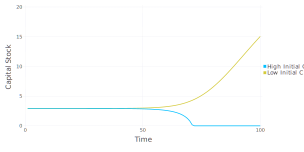

In [8]:
"""
    getshootingpath(para::NCParameters,c0,k0,T=100)

Computes the path generated by iterating on the Euler
equation for T periods.
"""
function getshootingpath(para::NCParameters,c0,k0,T=100)
    k,c = zeros(T),zeros(T)
    c[1],k[1] = c0,k0
    for t in 1:T-1
        c[t+1],k[t+1] = iterateEuler(para,c[t],k[t])
    end

    return (c=c,k=k) #named tuple for easy access
end

plot(layer(y=getshootingpath(para,c̄+0.00001,k̄).k,Geom.line,color = ["High Initial C"]),
     layer(y=getshootingpath(para,c̄-0.00001,k̄).k,Geom.line,color = ["Low Initial C"]),
     Guide.xlabel("Time"),Guide.ylabel("Capital Stock"),Guide.colorkey(title=""))

## Sadle Point
* The optimal allocation exists on a sadle point
    * If consumption is initially too high, capital will converge to 0
    * If consumption is initially too low, capital will blow up

* At exactly the optimal level of consumption the path will converge to steady state

* How do we find that level of consumption:
    * A root solver!

## Finding Optimal Consumption

In [9]:
"""
    findoptimal_c(para,k)

Finds the optimal consumption for a given level of capital.  Uses
shooting method with terminal T periods
"""
function findoptimal_c(para::NCParameters,k0,T=100)
    c̄,k̄ = compute_steadystate(para)
    #iterates on the Euler equation for T periods then returns 
    #capital relative to steady state
    function c_res(c0)
        c,k = iterateEuler(para,c0,k0)
        for t in 1:T
            c,k =  iterateEuler(para,c,k)
        end

        return k - k̄
    end
    #use bracketing algorithm
    fzero(c_res,(0.1*c̄,10*c̄))
end
println(findoptimal_c(para,k̄) - c̄)

-2.220446049250313e-16


## Optimal Path: From Steady State

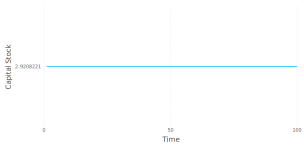

In [10]:
k0 = k̄
plot(y=getshootingpath(para,findoptimal_c(para,k0),k0).k,Geom.line(),
    Guide.xlabel("Time"),Guide.ylabel("Capital Stock"))

## Optimal Path: From Below Steady State

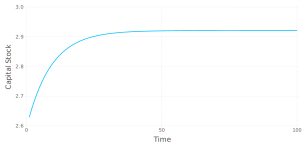

In [11]:
k0 = 0.9*k̄
plot(y=getshootingpath(para,findoptimal_c(para,k0),k0).k,Geom.line(),
    Guide.xlabel("Time"),Guide.ylabel("Capital Stock"))

## Optimal Path: From Above Steady State

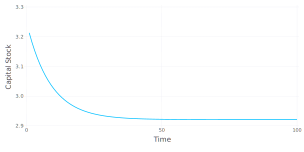

In [12]:
k0 = 1.1*k̄
plot(y=getshootingpath(para,findoptimal_c(para,k0),k0).k,Geom.line(),
    Guide.xlabel("Time"),Guide.ylabel("Capital Stock"))

# Multivariate Root Solving

## Extending Newton's Method
* Most are some variant of a multivariate  version of Newton's method

* Let $\mathbf f:\mathbb R^k\rightarrow\mathbb R^k$ represent a system of $k$ equations and $k$ unknowns

* Given $\mathbf x^n$, if we know the Jacobian, $\mathbf J^n$, at $x^n$ then $f$ can be approximated by
$$
\mathbf f(\mathbf x) \approx \mathbf f(\mathbf x^n) + \mathbf J^n(\mathbf x-\mathbf x^n)
$$

* This yields a candidate of
$$
    \mathbf x^{n+1} = \mathbf x^n - (\mathbf J^n)^{-1}\mathbf f(x^n)
$$

## Issues
* Generally speaking with multivariate root solving more can go wrong

    * Functions can be much less well behaved

* Also computing the derivative gets slower and slower, i.e. $k^2$ terms

* There are many different rootsolving algorithms

    * If you run into problems switch to another

    * You'd be surprised how often this is successful

* We'll use the "NLsolve" package but there are others

    * Plus easy wrapping of C code: GSL

## Using NLsolve

In [13]:
using NLsolve

#consider this function
f(x) = [(x[1]+3)*(x[2]^3-7)+18, sin(x[2]*exp(x[1])-1)];

res = nlsolve(f,[ 0.,0.])
#not_in_place?
println("Did the root solver converge: $(converged(res))")
println("What was the solution: $(res.zero)")
println("Check f at solution: $(f(res.zero))")

Did the root solver converge: true
What was the solution: [3.069182814858544e-17, 1.0]
Check f at solution: [0.0, 0.0]


## Alternative: Provid derivatives

In [14]:
#Note fvec is filled with function values
function f!(fvec,x )
    fvec[1] = (x[1]+3)*(x[2]^3-7)+18
    fvec[2] = sin(x[2]*exp(x[1])-1)
end;
#NOTE: NEED DERIVATIVES TO BE EXACT!
function g!(fjac,x)
    fjac[1, 1] = x[2]^3-7
    fjac[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    fjac[2, 1] = x[2]*u
    fjac[2, 2] = u
end;

res = nlsolve(f!,g!,zeros(2))
println("Did the root solver converge: $(converged(res))")
println("What was the solution: $(res.zero)")
println("Check f at solution: $(f(res.zero))")

Did the root solver converge: true
What was the solution: [-1.269743229976941e-16, 1.0]
Check f at solution: [0.0, -1.1102230246251565e-16]


## Compare speeds

In [15]:
@time nlsolve(f,zeros(2));
@time nlsolve(f!,g!,zeros(2));

  0.000051 seconds (169 allocations: 15.281 KiB)
  0.000035 seconds (116 allocations: 9.594 KiB)


# Solving Perfect Foresight Models
## Another Way To Solve Perfect Forsight Models
* Instead of shooting algorithm:
    * Think of optimal path as multidimensional problem

* Want: $\{k_t\}_{t=0}^\infty$ that statisfies equilibrium conditions
    
* Solving for the infinite path would be impracticable
    
* But we can assume $k_t\approx \bar k$ for $t>T$
    * After long enough we are at steady state

* Problem then reduces to finding $\{k_t\}_{t=0}^T$


## Residuals of Equilibrium Conditions

In [16]:
"""
    capitalpath_residual(para,k0::Float64,k::Vector{Float64})

Computes the euler equation errors given a guess of k[t] = kpath[t]
for t <=T and k[t] = k̄ after.
"""
function capitalpath_residual(para::NCParameters,k0::Float64,kpath::Vector{Float64})
    @unpack A,α,β,δ,σ = para
    c̄,k̄ = compute_steadystate(para)
    T = length(kpath)
    k = [k0;kpath;k̄]
    #compute path of c given guess of k
    c = [A*k[t]^α + (1-δ)*k[t] - k[t+1] for t in 1:T+1]
    #compute path of R given guess of k
    R = [1-δ+α*A*k[t]^(α-1) for t in 1:T+1]
    uc = c.^(-σ)

    #compute Euler equation residuals
    return uc[1:T] .- β .* R[2:T+1].*uc[2:T+1]
end;

## Using A Non-Linear Solver

In [17]:
"""
    solveMITshock(para::NCParameters,k0::Float64,T=100)

Finds the perfect forsight equilibrium for a given intial k0
"""
function solveMITshock(para::NCParameters,k0::Float64,T=100)
    @unpack A,α,β,δ,σ = para
    c̄,k̄ = compute_steadystate(para)
    kpath0 = collect(LinRange(k0,k̄,T))# guess a simple linear rule

    result = nlsolve(k->capitalpath_residual(para,k0,k),kpath0)
    if !converged(result)
        error("Could not find root!")
    end

    kpath = result.zero
    k = [k0;kpath;k̄]
    #compute path of c given guess of k
    c = [A*k[t]^α + (1-δ)*k[t] - k[t+1] for t in 1:T+1]

    return (c=c,k=k)
end;

## Compare To Shooting: Below Steady State

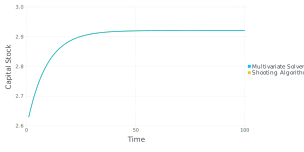

In [18]:
k0=0.9*k̄
plot(layer(y=solveMITshock(para,k0).k[1:100],Geom.line(),color=["Multivariate Solver"]),
     layer(y=getshootingpath(para,findoptimal_c(para,k0),k0).k,Geom.line(),color=["Shooting Algorithm"]),
    Guide.xlabel("Time"),Guide.ylabel("Capital Stock"),Guide.colorkey(title=""))

## Compare To Shooting: Above Steady State

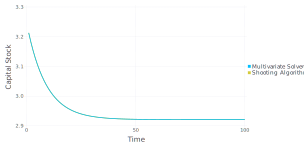

In [19]:
k0=1.1*k̄
plot(layer(y=solveMITshock(para,k0).k[1:100],Geom.line(),color=["Multivariate Solver"]),
     layer(y=getshootingpath(para,findoptimal_c(para,k0),k0).k,Geom.line(),color=["Shooting Algorithm"]),
    Guide.xlabel("Time"),Guide.ylabel("Capital Stock"),Guide.colorkey(title=""))

# Application
## The DMP model
* Economy is populated by a continuum of risk neutral workers

    * Discount rate $\beta$, measure 1

* Production is done by firm-worker pairs

    * Aggregate productivity $z$ follows Markov process $P(z,z')$

* Employed workers receive wage $w(z)$

    * Separate at a rate $\delta$

* Contemporaneous firm profit: $z - w(z)$

* Free entry by firms

    * Flow cost of vacancy: $\kappa>0$

## Matching
* Matches are produced using a CRS matching function $M(u,v)$

    * $u$ is mass of unemployed

    * $v$ is mass of vacancies

* Probability of a match only depends on $\theta = v/u$

    * Since $M(u,v) = u M(v/u,1) = up(\theta)$

* Probability of worker finding a match: $M/u = p(\theta)$

* Probability of firm finding a match: $M/v = \frac{u}{v}\frac{M}{u} = p(\theta)/\theta = q(\theta)$

## Bellman Equations: Worker

* Take $w(z)$ and $\theta(z)$ as given

* Let $U(z)$ be the value of being unemployed

* Let $W(z)$ be the value of being employed

* What are the Bellman Equations for the worker?

$$
    U(z) = b + \beta \mathbb E\left[p(\theta(z))W(z')+(1-p(\theta(z)))U(z')\bigg|z\right]
$$
$$
    W(z) = w(z) + \beta \mathbb E\left[\delta U(z')+(1-\delta)W(z')\bigg|z\right]
$$


## Bellman Equations: Firm
* Let $V(z)$ be the value of a vacant firm

* Let $J(z)$ be the value of a matched firm

* What are the Bellman Equations for a firm?

$$
    V(z) = -\kappa + \beta \mathbb E\left[q(\theta(z))J(z')+(1-q(\theta(z)))V(z')\bigg|z\right]
$$
$$
    J(z) = z - w(z) + \beta \mathbb E\left[\delta V(z') + (1-\delta)J(z')\bigg| z\right]
$$

* Free Entry?

$$
    V(z) = 0 \quad \forall z
$$

## Nash Bargaining

* Wage $w(z)$ is determined by bargaining between a worker and a firm

* Wage solves
$$
    \max_{w(z)} \left[W(z)-U(z)\right]^\eta\left[J(z)-V(z)\right]^{1-\eta}
$$

* $\eta$ is the bargaining power of the worker

* Takes $U(z)$ and $V(z)=0$ as given

* Let $S(z) = W(z)-U(z) + J(z)-V(z)$ then
$$
    W(z) - U(z) = \eta S(z)
$$
and
$$
    J(z) - V(z) = (1-\eta) S(z)
$$


## Equilibrium Definition?

## Solving for Equilibrium

* With a little (ok alot) algebra:
$$
    w(z) = \eta z + (1-\eta)b + \eta \kappa \theta(z)
$$

* Moreover, free entry implies that for all $z$:
$$
    \frac{\kappa}{\beta q(\theta(z))} = \mathbb E\left[(1-\eta)(z'-b)+\eta \kappa \theta(z') + \frac{(1-\delta)\kappa}{q(\theta(z'))}\bigg| z\right]
$$ 

* Or
$$
    \frac{\kappa}{\beta q(\theta(z_i))} = \sum_jP_{ij}\left[(1-\eta)(z_j-b)+\eta \kappa \theta(z_j) + \frac{(1-\delta)\kappa}{q(\theta(z_j))}\right]
$$

* This is a non-linear system of $S$ equations and $S$ unkowns.

# The Quantitative Model

## Calibration Pt 1
* Mostly taken from Shimer (2005)

* Choose a period to be a quarter, $\beta = 0.99$

* Cobb-Douglass matching function $M(u,v) = Au^\alpha v^{1-\alpha}$, with $\alpha = 0.72$ 

* $\eta = \alpha = 0.72$ ensures competitive equilibrium is a solution to a social planner's problem 

* $b =0.4$ to match upper end of replacement rate

* $\delta = 0.05$ to target quarterly separation rates

* $\log z_t$ follows AR(1) process with $\rho = 0.8$ and $\sigma = 0.014$.
    * Will approximate via Rouwenhorst with 101 points.
    * Targets average productivity of 1

* Two parameters left: $A$ and $\kappa$
    * Naturally target job finding rate and long run market tightness $\theta$

## Calibration Pt 2
* One more normalization in the model: long run $\theta$ can be anything

* Observe
$$
    \frac{\kappa}{\beta q(\theta(z_i))} = \sum_jP_{ij}\left[(1-\eta)(z_j-b)+\eta \kappa \theta(z_j) + \frac{(1-\delta)\kappa}{q(\theta(z_j))}\right]
$$

* Can double $\kappa$ and multiply $A$ by $2^{1-\alpha}$ will result in a solution that
    * Doubles $\theta(z_j)$
    * Leaves $p(\theta(z_j)$ unchanged and haves $q(\theta(z_j)$

* Choose $\kappa = 0.212$ to target average $\theta = 1$

* $A=0.83$  to give quaterly job finding rate of $0.83$

## A Parameteter Sruct
* Often helpful to define an object with all parameters of a Model

In [20]:
using QuantEcon,Parameters,DataFrames,Random,Gadfly
"""
An object containing all the model parameters for our DMP model,
with default values 0.99,0.212,0.72,0.4,0.05,0.72,0.83
"""
@with_kw mutable struct DMPModel
    β::Float64 = 0.99
    κ::Float64 = 0.212
    η::Float64 = 0.72
    b::Float64 = 0.4
    δ::Float64 = 0.05
    α::Float64 = 0.72
    A::Float64 = 0.83
    z::Vector{Float64}
    P::Matrix{Float64}
end

DMPModel

## A constructor function
* `@with_kw` will make a constructor with defaults for all variables provided

* Need a constructor for the other variables

* We'll make one using the ingredients of the Makov chain

In [21]:
"""
    DMPParameters(Nz,ρ_z,σ_z) 

Constructs an instance of DMPParameters from model parameters
"""
function DMPModel(Nz,ρ_z,σ_z)
    mc = rouwenhorst(Nz,ρ_z,σ_z)
    return DMPModel(z = exp.(mc.state_values), P = mc.p)
end

model = DMPModel(51,0.8,0.014)
println(model.β)
println(model.z)

0.99
[0.8479008414524082, 0.8535152075952256, 0.8591667492020177, 0.8648557124297126, 0.8705823450651634, 0.8763468965359414, 0.8821496179211998, 0.8879907619626096, 0.893870583075368, 0.8997893373592798, 0.9057472826099116, 0.9117446783298205, 0.9177817857398575, 0.9238588677905438, 0.9299761891735253, 0.9361340163331003, 0.9423326174778254, 0.948572262592197, 0.9548532234484107, 0.9611757736181993, 0.9675401884847473, 0.9739467452546864, 0.9803957229701684, 0.9868874025210203, 0.9934220666569775, 1.0, 1.0066214890566687, 1.0132868222306652, 1.0199962898353323, 1.0267501841063196, 1.0335487992143122, 1.040392431277843, 1.0472813783761903, 1.0542159405623612, 1.0611964198761608, 1.068223120357347, 1.0752963480588735, 1.0824164110602215, 1.0895836194808153, 1.0967982854935332, 1.1040607233383017, 1.1113712493357841, 1.1187301819011573, 1.1261378415579808, 1.1335945509521577, 1.1411006348659867, 1.1486564202323097, 1.1562622361487502, 1.1639184138920486, 1.1716252869324901, 1.17938319094

## Equilibrium Residuals
* Construct a function that must be zero if we have found equilibrium

* Need to find market tightness for every state of the world

In [22]:
p(dmp,θ) = dmp.A*θ.^(1-dmp.α) #note the .^
q(dmp,θ) = dmp.A*θ.^(-dmp.α)   

"""
    residuals(dmp::DMPModel,θvec)

Computes the residuals of the equilibrium conditions given θvec for a 
given set of parameters dmp
"""
function residuals(dmp::DMPModel,θvec)
    #note: unpack retreives parameter values from object
    @unpack η,z,P,b,κ,δ,β = dmp
    S = length(z)
    qvec = q(dmp,θvec)
    #note @. means vectorize all operations
    rhs = @.((1-η)*(z -b) -η*κ*θvec+(1-δ)*κ/qvec)
    lhs = @.(κ/(β*qvec))
    return P*rhs -lhs
end

residuals

## Solving for the Equilibrium
* Solving for an equilibrium is then solving for a root

In [23]:
"""
    equilibrium(dmp::DMPModel)

Solves for the equilibrium of the DMP model with parameters in 
struct dmp
"""
function equilibrium(dmp::DMPModel)
    S = length(dmp.z)
    return nlsolve(x->residuals(dmp,x),ones(S)).zero
end

θvec = equilibrium(model)
println((model.P^500*θvec)[1]) #Almost 1 but not quite

1.0005292070468161


## Calibrating $\kappa$
* Internally calibrating $\kappa$ can be done by adding an extra constraint

In [24]:
"""
    calibrate_κ!(dmp::DMPModel)

Internally calibrates κ to target an average θ of 1
"""
function calibrate_κ!(dmp::DMPModel)
    θvec0 = equilibrium(dmp) #first find the equilibrium for a given κ
    function res(κθvec)
        κ,θvec = κθvec[1],κθvec[2:end]
        dmp.κ = κ #note changing value form dmp
        return [1-(dmp.P^500*θvec)[1]; #long run θ is 1
                residuals(dmp,θvec)]#eqb residuals must be 0
    end
    κθvec0 = [dmp.κ;θvec] #

    dmp.κ =  nlsolve(res,κθvec0).zero[1]

    return equilibrium(dmp)
end

θvec = calibrate_κ!(model)
println((model.P^500*θvec)[1])

1.0


## Check Equilibrium

## Equilibrium Dynamics
* We've solved for the dynamics of $\theta_t = \theta(z_t)$

* Let $u_t$ the the unemployment rate at time $t$

* Output will be given by $y_t = z_t (1-u_t)$

* Vacancies are given by $v_t = \theta_tu_t$

* Dynamics of unemployment $u_{t+1} = u_t + \delta(1-u_t)-p(\theta_t)u_t$

## Simulating

In [25]:
function simulate_economy(dmp,initial_state,T)
    s1,u1 = initial_state
    θvec = equilibrium(dmp)
    #preallocate space
    u,v,y,z,θ = zeros(T+1),zeros(T),zeros(T),zeros(T),zeros(T)
    u[1] = u1
    s = simulate_indices(MarkovChain(model.P),T,init=s1)
    for t in 1:T
        θ[t] = θvec[s[t]]
        z[t] = dmp.z[s[t]]
        y[t] = z[t]*(1-u[t])
        v[t] = θ[t]*u[t]
        u[t+1] = u[t]+dmp.δ*(1-u[t])-p(dmp,θ[t])*u[t]
    end
    #often convenient to return simulations as DataFrame
    return DataFrame(u=u[1:T],v=v,y=y,θ=θ,z=z)
end

simulate_economy (generic function with 1 method)

## Simulation Paths

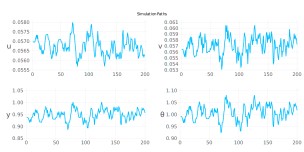

In [26]:
df_sim = simulate_economy(model,(25,0.057),200)
title(gridstack([plot(df_sim,y=:u,Geom.line) plot(df_sim,y=:v,Geom.line);
           plot(df_sim,y=:y,Geom.line) plot(df_sim,y=:θ,Geom.line)] ),
           "Simulation Paths")

What's wrong with this picture?

## Impuse Response Function
* Often if we want understand the dynamics of an Economy
    * helpful to study impulse response functions (IRFs)

* Idea: start the economy at a particular state (level of unemployment)
    
    * Compare expected path of endogenous variable $x_t$ if there is a productivity shock

    * To expected path if that shock never occured

    * Usually use 1 standard deviation

* Computing
$$
    \mathbb E_t[x_{t+s}|u_t,z_t+\sigma_z] - \mathbb E_t[x_{t+s}|u_t,z_t]
$$

* Can compute IRF using monte carlo methods 

* In a non-linear model IRF will depend on the state

## IRF Implementation

In [27]:
function impulseResponse(dmp,u0,s0,s0′,T,N=100)
    
    #compute average path with initial state s0
    Random.seed!(4234345) #use the same random seed
    df_irf = simulate_economy(dmp,(s0,u0),T)
    for i in 2:N
        df_irf .+= simulate_economy(dmp,(s0,u0),T)
    end
    df_irf ./= N 

    #compute average path with initial state s0′
    Random.seed!(4234345) #use the same random seed
    df_irf′ = simulate_economy(dmp,(s0′,u0),T)
    for i in 2:N
        df_irf′ .+= simulate_economy(dmp,(s0′,u0),T)
    end
    df_irf′ ./= N 

    #return difference
    return df_irf′ .- df_irf
end

impulseResponse (generic function with 2 methods)

## Visualizing IRF

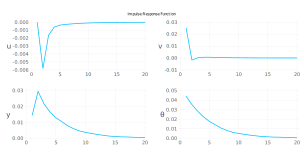

In [28]:
df_irf = impulseResponse(model,0.57,25,30,20)

title(gridstack([plot(df_irf,y=:u,Geom.line) plot(df_irf,y=:v,Geom.line);
           plot(df_irf,y=:y,Geom.line) plot(df_irf,y=:θ,Geom.line)] ),
           "Impulse Response Function")